# B2B 분석 제안서

- 팀원

ICT공학부/이재성/202184042

ICT공학부/김성중/201904192

산업데이터사이언스학부/전병준/201904236

산업데이터사이언스학부/우사랑/201904217


## 개요

- 문제 설명

: 최근 기업은 MQL(Marketing Qualified Leads)를 생성하고 관리함으로써 잠재 고객을 찾고 모니터링하여 이를 영업의 기회로 전환하고자 합니다.

영업 기회 전환 고객 선별을 위해 AI모델을 개발하여 미래 영업 기회를 예측하여 데이터에 기반한 의사 결정을 강화하는 것이 목적입니다.

따라서 MQL 데이터를 활용하여 영업 기회 전환을 예측하는 AI 모델을 구현하고 그 성능을 비교하는 것이 목적입니다.

## 데이터 수집

- 출처 : LG AI Research

- 수집 방법

: 위 데이터는 LG Aimers 4기 공모전 데이터로 LG AI Research에서 제공해준 데이터입니다.

- 수집된 데이터의 구조 및 특성 설명

: train가 csv 파일로 구성되어 있으며, row - 59,299개 / columns - 29개입니다.


대부분의 컬럼이 수치형 데이터가 아닌 범주형으로 구성되어있으며, unique 개수가 많은 범주형 데이터 셋입니다.


텍스트 데이터도 포함되어있으며, 여러 언어가 등장하는 데이터로 구성되어있습니다.


target column은 is_converted로 True or False로 구성된 이진 데이터로 영업 전환 성공과 실패 의미입니다.


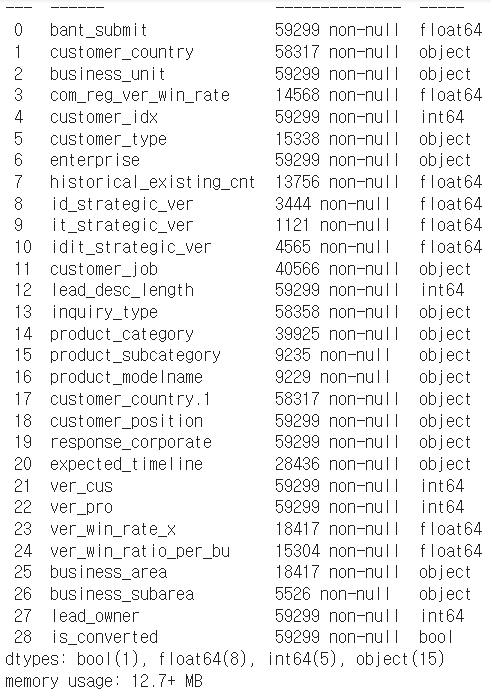

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings(action = 'ignore')


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/lg_aimers/train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

## 데이터 탐색 및 시각화

bant_submit : MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율

customer_country : 고객의 국적

business_unit : MQL 요청 상품에 대응되는 사업부

com_reg_ver_win_rate : Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산

customer_idx : 고객의 회사명

customer_type : 고객 유형

enterprise : Global 기업인지, Small/Medium 규모의 기업인지

historical_existing_cnt : 이전에 Converted(영업 전환) 되었던 횟수

id_strategic_ver : (도메인 지식) 특정 사업부(Business Unit이 ID일 때), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

it_strategic_ver : (도메인 지식) 특정 사업부(Business Unit이 IT일 때), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

idit_strategic_ver : id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현

customer_job : 고객의 직업군

lead_desc_length : 고객이 작성한 Lead Descriptoin 텍스트 총 길이

inquiry_type : 고객의 문의 유형

product_category : 요청 제품 카테고리

product_subcategory : 요청 제품 하위 카테고리

product_modelname : 요청 제품 모델명

customer_country.1 : 담당 자사 법인명 기반의 지역 정보(대륙)

customer_position : 고객의 회사 직책

response_corporate : 담당 자사 법인명

expected_timeline : 고객의 요청한 처리 일정

ver_cus : 특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치

ver_pro : 특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치

ver_win_rate_x : 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값

ver_win_ratio_per_bu : 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

business_area : 고객의 사업 영역

business_subarea : 고객의 세부 사업 영역

lead_owner : 영업 담당자 이름

is_converted : 영업 성공 여부. True일 시 성공

### target columns 분포 파악

92 : 8 로 이루어졌으며, 상당히 불균형이라는 것을 알 수 있습니다.

추후에 밸런스를 맞출 필요가 있음.

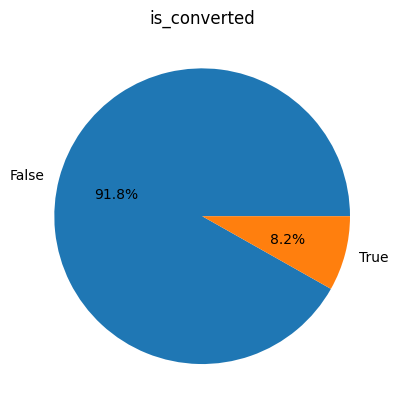

In [ ]:
import matplotlib.pyplot as plt

target = df_train['is_converted'].value_counts(normalize = True) * 100

target.plot(title = 'is_converted', kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

### na 갯수 확인

na 값을 포함하고 있는 컬럼의 갯수가 많으며, 5만 / 4만 / 1만 / 900대를 포함

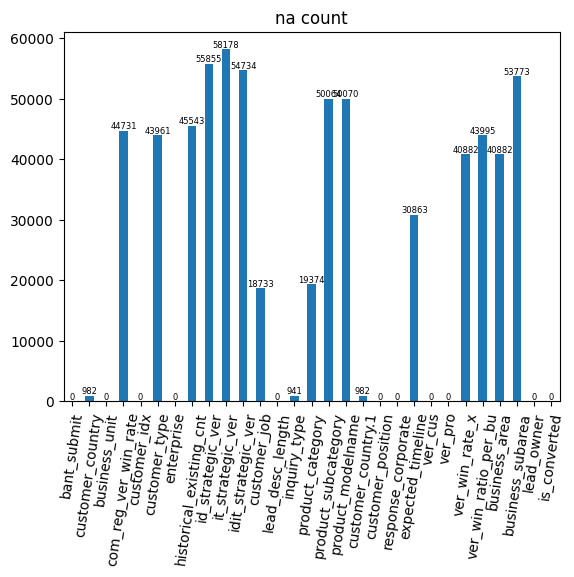

In [ ]:
all_na = df_train.isna().sum()

ax = all_na.plot(title = 'na count', kind = 'bar')
for i, val in enumerate(all_na):
    ax.text(i, val, str(val), ha='center', va='bottom', fontsize = 6)
plt.xticks(rotation = 82)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/LG Aimers/LG Aimers train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/LG Aimers/submission.csv')

# 데이터 설명
bant_submit : MQL 구성 요소들 중 [1]Budget(예산), [2]Title(고객의 직책/직급), [3]Needs(요구사항), [4]Timeline(희망 납기일) 4가지 항목에 대해서 작성된 값의 비율

customer_country : 고객의 국적

business_unit : MQL 요청 상품에 대응되는 사업부

com_reg_ver_win_rate : Vertical Level 1, business unit, region을 기준으로 oppty 비율을 계산

customer_idx : 고객의 회사명

customer_type : 고객 유형

enterprise : Global 기업인지, Small/Medium 규모의 기업인지

historical_existing_cnt : 이전에 Converted(영업 전환) 되었던 횟수

id_strategic_ver : (도메인 지식) 특정 사업부(Business Unit이 ID일 때), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

it_strategic_ver : (도메인 지식) 특정 사업부(Business Unit이 IT일 때), 특정 사업 영역(Vertical Level1)에 대해 가중치를 부여

idit_strategic_ver : id_strategic_ver이나 it_strategic_ver 값 중 하나라도 1의 값을 가지면 1 값으로 표현

customer_job : 고객의 직업군

lead_desc_length : 고객이 작성한 Lead Descriptoin 텍스트 총 길이

inquiry_type : 고객의 문의 유형

product_category : 요청 제품 카테고리

product_subcategory : 요청 제품 하위 카테고리

product_modelname : 요청 제품 모델명

customer_country.1 : 담당 자사 법인명 기반의 지역 정보(대륙)

customer_position : 고객의 회사 직책

response_corporate : 담당 자사 법인명

expected_timeline : 고객의 요청한 처리 일정

ver_cus : 특정 Vertical Level 1(사업영역) 이면서 Customer_type(고객 유형)이 소비자(End-user)인 경우에 대한 가중치

ver_pro : 특정 Vertical Level 1(사업영역) 이면서 특정 Product Category(제품 유형)인 경우에 대한 가중치

ver_win_rate_x : 전체 Lead 중에서 Vertical을 기준으로 Vertical 수 비율과 Vertical 별 Lead 수 대비 영업 전환 성공 비율 값을 곱한 값

ver_win_ratio_per_bu : 특정 Vertical Level1의 Business Unit 별 샘플 수 대비 영업 전환된 샘플 수의 비율을 계산

business_area : 고객의 사업 영역

business_subarea : 고객의 세부 사업 영역

lead_owner : 영업 담당자 이름

is_converted : 영업 성공 여부. True일 시 성공

In [ ]:
# 수치형 데이터
int_data = df_train[df_train.describe().columns]
# 범주형 데이터
str_data = df_train.drop(int_data.columns, axis = 1)

# 수치형 데이터
- 결측치가 있는 컬럼이 대부분 90%정도가 na값인 것을 확인.

- 컬럼 자체를 drop을 할 건지, 다른 컬럼과 엮어서 na값을 채울 것인지 고민해봐야 함.

- 0,1 로 구성되어 있는 컬럼을 category형으로 변환 필요

- 이상치를 확인해보고 지울 수 있는 것을 지울 예정


In [ ]:
int_data.isna().sum()

bant_submit                    0
com_reg_ver_win_rate       44731
customer_idx                   0
historical_existing_cnt    45543
id_strategic_ver           55855
it_strategic_ver           58178
idit_strategic_ver         54734
lead_desc_length               0
ver_cus                        0
ver_pro                        0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
lead_owner                     0
dtype: int64

In [ ]:
def int_plt(df_train, columns):
  col = columns
  fig, axes = plt.subplots(1,2,figsize=(10,4))
  df_train[col].hist(bins = 50, ax = axes[0])
  axes[0].set_title('histogram')

  df_train[col].plot(kind = 'box', ax=axes[1])
  axes[1].set_title('Boxplot')

  plt.tight_layout()

  plt.show()

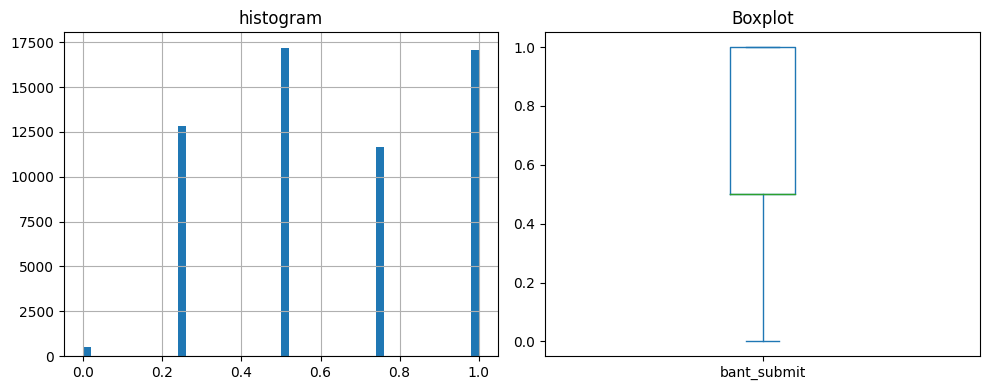

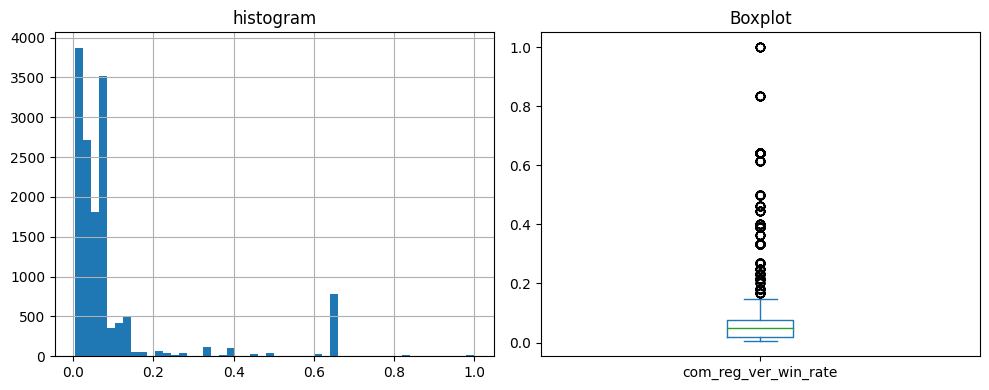

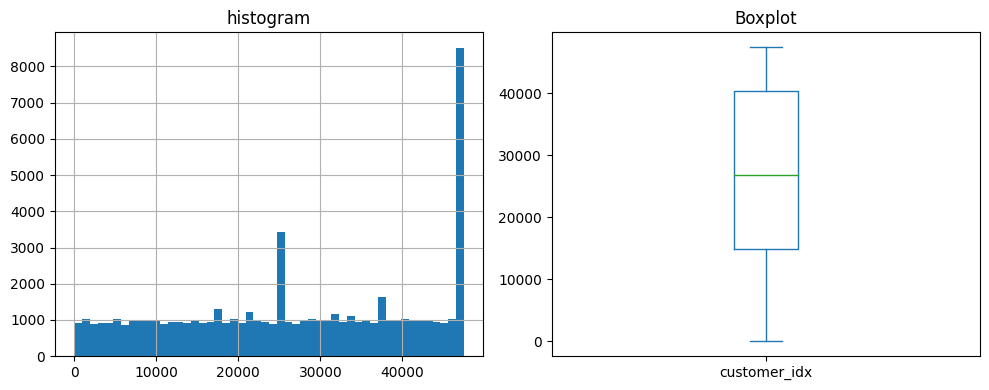

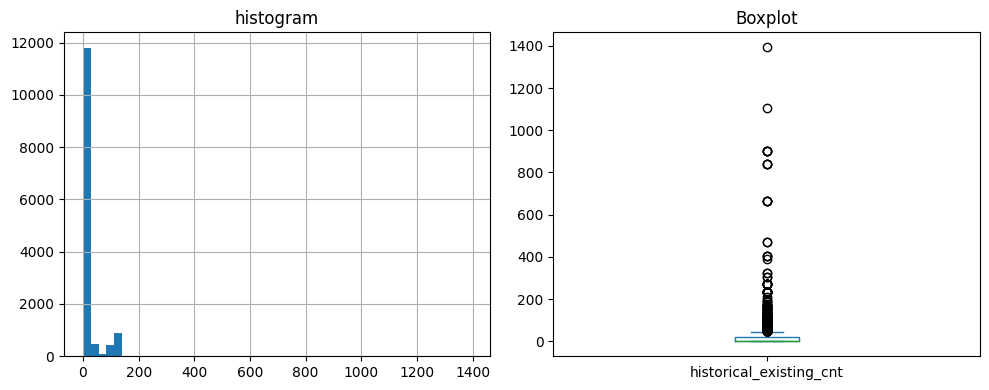

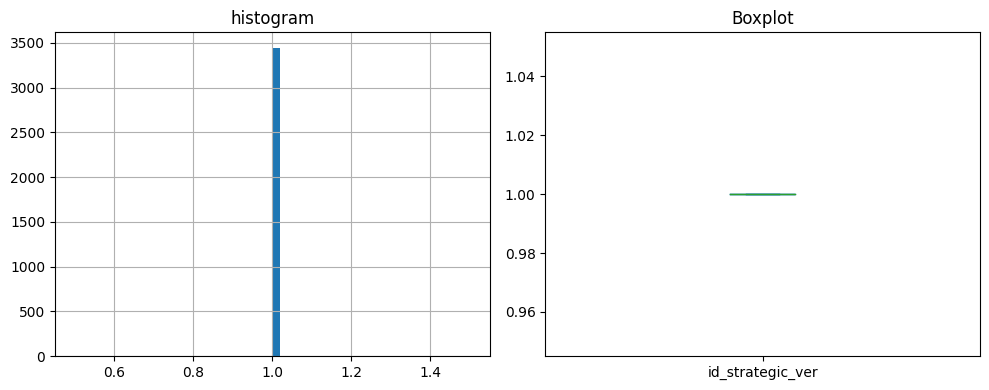

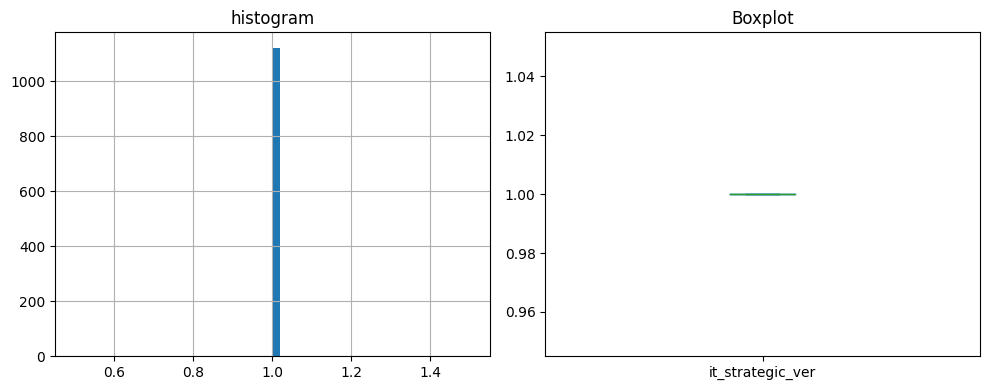

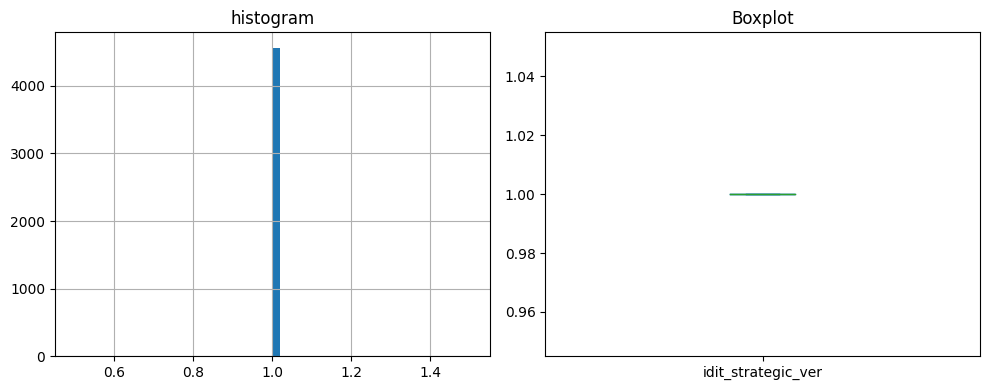

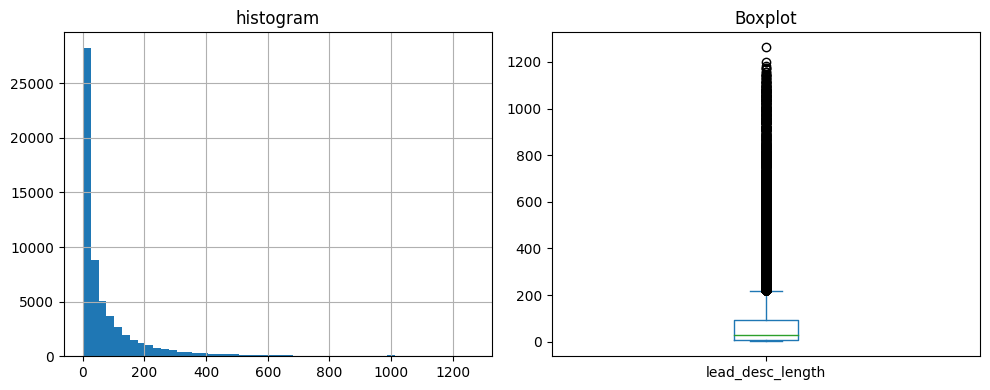

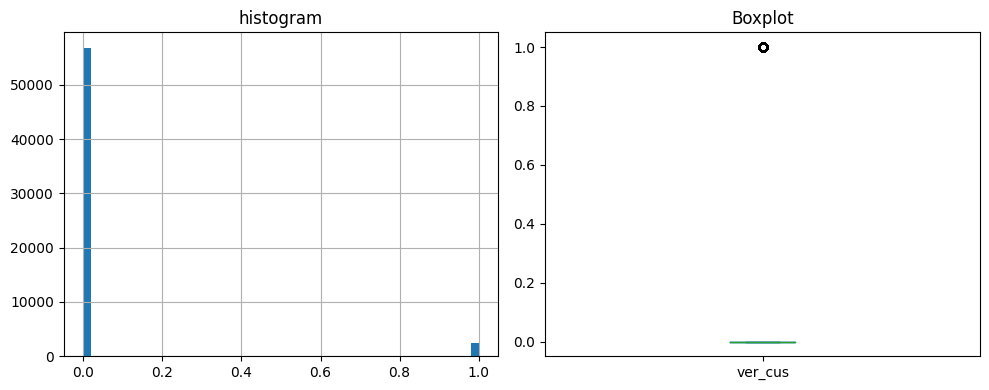

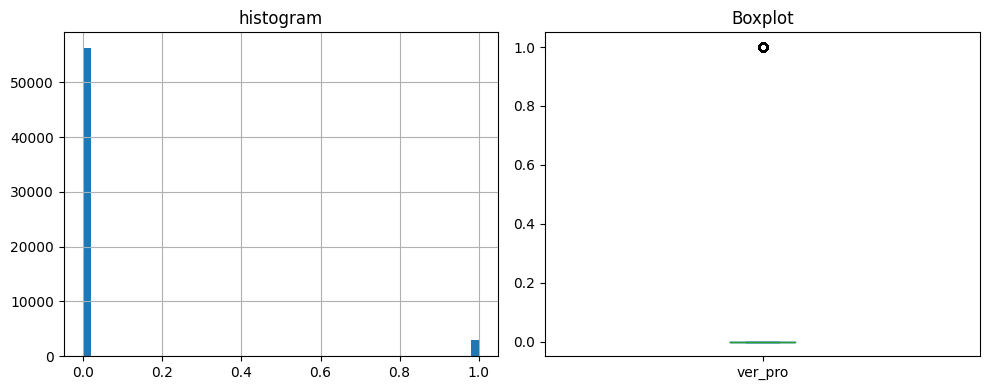

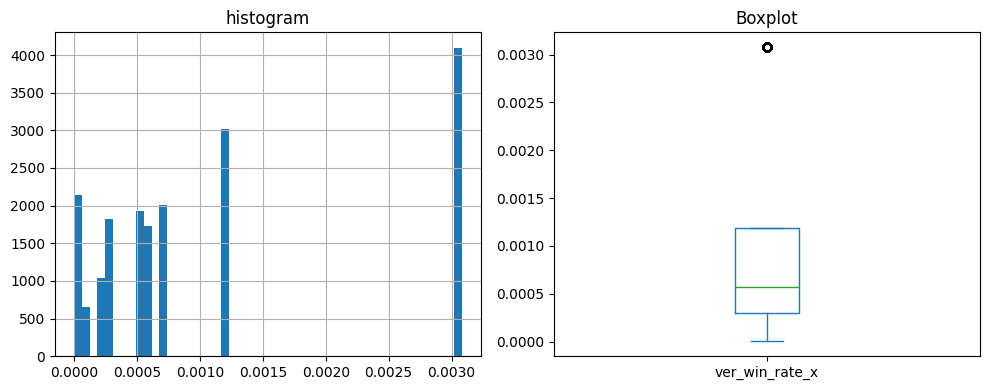

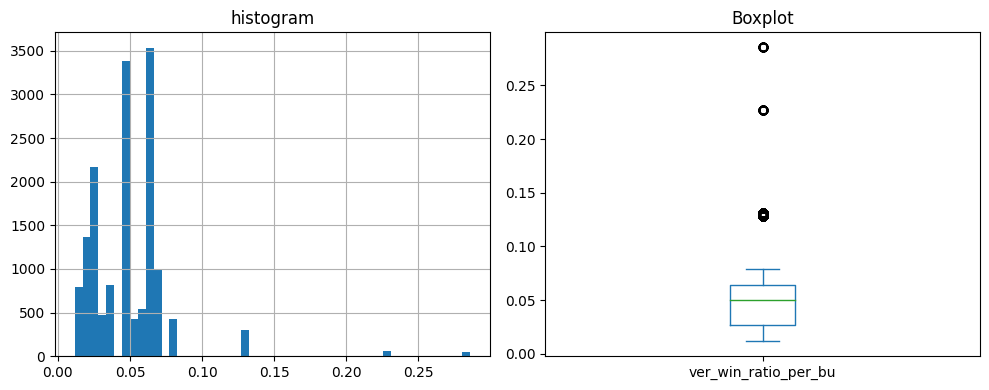

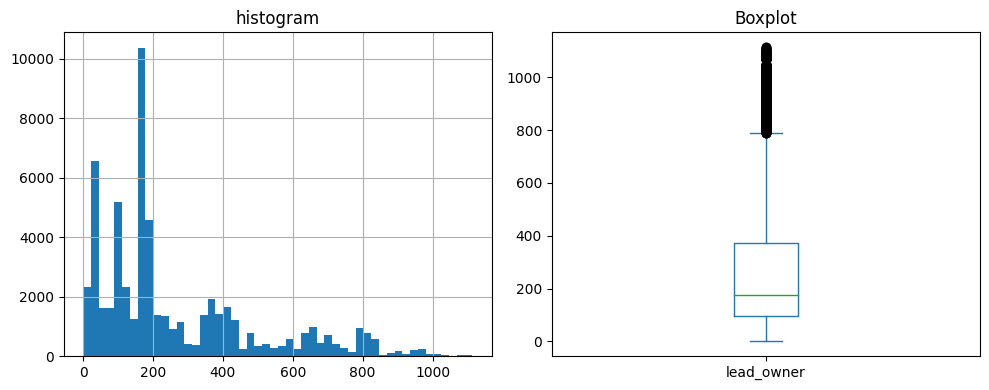

In [ ]:
int_col = int_data.columns
for i in int_col:
  int_plt(int_data, i)

# 범주형 데이터

In [ ]:
str_data.isna().sum()

customer_country         982
business_unit              0
customer_type          43961
enterprise                 0
customer_job           18733
inquiry_type             941
product_category       19374
product_subcategory    50064
product_modelname      50070
customer_country.1       982
customer_position          0
response_corporate         0
expected_timeline      30863
business_area          40882
business_subarea       53773
is_converted               0
dtype: int64

## customer_country / customer_country.1

- 두 개의 컬럼이 같은 value값을 표시하고 있음
- /지역/나라 이런식으로 구성
- 영어만 있는 것이 아닌 히브리어, 중국어 등 다양한 언어가 있는 것을 확인
- 간단한 자연어처리가 필요함(공백/특수문자/숫자 제거)
- 나라말고 이메일이 들어가 있는 경우 존재 (결측치로 전환 필요)


In [ ]:
col = ['customer_country','customer_country.1']
str_data[col]

,customer_country,customer_country.1
0,/Quezon City/Philippines,/Quezon City/Philippines
1,/PH-00/Philippines,/PH-00/Philippines
2,/Kolkata /India,/Kolkata /India
3,/Bhubaneswar/India,/Bhubaneswar/India
4,/Hyderabad/India,/Hyderabad/India
...,...,...
59294,/Sląskie/Poland,/Sląskie/Poland
59295,/Bogotá DC /Colombia,/Bogotá DC /Colombia
59296,/Pisco/Peru,/Pisco/Peru
59297,/santa cruz bolivia/Peru,/santa cruz bolivia/Peru


## customer_type / customer_job / inquiry_type
- 간단한 NLP 필요 (공백, 특수기호 제거)
- 고객의 유형 범위를 줄여서 Maping 필요


In [ ]:
col = ['customer_type','customer_job','inquiry_type']
str_data[col]

,customer_type,customer_job,inquiry_type
0,End-Customer,purchasing,Quotation or purchase consultation
1,End-Customer,media and communication,Quotation or purchase consultation
2,End-Customer,engineering,Product Information
3,End-Customer,entrepreneurship,Quotation or purchase consultation
4,Specifier/ Influencer,consulting,Quotation or purchase consultation
...,...,...,...
59294,End Customer,engineering,Product Information
59295,Specifier/ Influencer,entrepreneurship,NaN
59296,Specifier/ Influencer,engineering,NaN
59297,NaN,entrepreneurship,Quotation or Purchase Consultation


## product_category / product_subcategory / product_modelname

- 3개의 컬럼이 서로 연관이 있을 것이라고 판단
- 서로 엮어서 결측치를 채울 생각


In [ ]:
col = ['product_category','product_subcategory','product_modelname']
str_data[col]

,product_category,product_subcategory,product_modelname
0,multi-split,NaN,NaN
1,multi-split,NaN,NaN
2,single-split,NaN,NaN
3,vrf,NaN,NaN
4,multi-split,NaN,NaN
...,...,...,...
59294,vrf,NaN,NaN
59295,etc.,NaN,NaN
59296,single-split,NaN,NaN
59297,etc.,NaN,NaN


## expected_timeline
- 시계열적 특징을 가진 컬럼
- 문장으로 되어 있어 NLP필요
- 간단한 수치형으로 변경(3개월 미만, 3개월 이상....)

In [ ]:
col = ['expected_timeline']
str_data[col]

,expected_timeline
0,less than 3 months
1,less than 3 months
2,less than 3 months
3,less than 3 months
4,less than 3 months
...,...
59294,3 months ~ 6 months
59295,9 months ~ 1 year
59296,less than 3 months
59297,more than a year


## business_area / business_subarea
- 두 개의 컬럼 NA값이 절반이상임
- 특정 사업의 영역과 관련 있는 컬럼이 많기 때문에 컬럼 드랍은 보류
- NA 값 그대로 사용을 생각 중

In [ ]:
col = ['business_area','business_subarea']
str_data[col]

,business_area,business_subarea
0,corporate / office,Engineering
1,corporate / office,Advertising
2,corporate / office,Construction
3,corporate / office,IT/Software
4,corporate / office,NaN
...,...,...
59294,public facility,Others
59295,public facility,NaN
59296,public facility,NaN
59297,public facility,NaN


##  새로운 컬럼 생성
- 고객의 영업 성공 전환율을 예측하는 것이 과제의 목표
- 특정 고객이나, 특정 나라의 영업 성공확률을 구하여 새로운 컬럼 만들 예정